5050 HW 6  
Johan Boer  
u1106197

----

**Problem 1**  
Consider the heat equation
$$\frac{\partial u}{\partial t}(t,x) = \frac{\partial^2u}{\partial x^2}(t,x) + 3\frac{\partial u}{\partial t}(t,x)$$
with initial heat profile $u(0,x)=e^{-x^2}$ where we can solve this equation using a standard Brownian motion  
$$ u(t,x) = E[e^{-(x+\sigma B(t) + \mu t)^2}]$$

**(a)** Compute $\frac{1}{\sqrt{2\pi}}\int_{- \infty}^{\infty} e^{-(az+b)^2}e^{-z^2/2}dz$

First we expand the squares in the exponent  
$$ e^{-(az+b)^2}e^{-z^2/2} = e^{-(\frac{z^2}{2}+a^2z^2+2abz+b^2)} $$
Then completing the square  
$$ e^{-(\sqrt{a^2+1/2}x+\frac{ab}{\sqrt{a^2+1/2}})}e^{-(\frac{-a^2b^2}{a^2+1/2}+b^2)} $$
where the first exponential is in the form of a normal variable and the second exponential is a constant  
Therefore the integral is  
$$ \frac{e^{-\frac{b^2}{2a^2+1}}}{\sqrt{2a^2+1}} $$

In [1]:
# Code for Brownian Motion
import numpy as np
import matplotlib.pyplot as plt
import math

def brownian(time, segments):
    # Construct time vector
    t = []
    for i in range(segments+1):
        t.append(time*i/segments)
    
    # Generate the random walk
    rw = [0]
    for i in range(segments):
        rw.append(np.random.normal(0,1)+rw[-1])
        
    # Scale the rw by 1 over the square root of N times the variance
    bm = np.array(rw)
    bm = bm/(math.sqrt(segments))*math.sqrt(time)
    
    # Return an array with [time,values]
    return [t,bm]

**Problem 2**  
Let $B(t)$ be standard Brownian motion and let $Y(t)$ be 1 for $0\leq t<2$  
and $3B(2)$ for $t\geq 2$ prove that:
$$ M(t) = \int_0^t Y(s)dB(s)$$
is a martingale

We can start by seperating the stochastic integrals into two parts,   before $t=2$ and, at or after $t=2$.  
Then for both scenarios we need to show that the integral is a "fair game"  
for $0\leq t <2$, 
$$ M(t) = \int_0^t 1dB(s) = B(t)- B(0) = B(t) $$
and for $t\geq 2$
$$ M(t) = \int_0^2 1dB(s) +\int_2^t 3B(2)dB(s) = B(2) + 3B(2)(B(t)-B(2)) $$
Then we need to show $E[M(t)|\mathcal{F}_s]= M(s) $ for all $s<t$ which gives 3 cases: $s<t<2$, $2≤s<t$ and, $s<2≤t$  
For the first case $E[M(t)|\mathcal{F}_s] = E[B(t)|\mathcal{F}_s] = E[B(t-s)]+B(s) = B(s)$  
For the second $E[M(t)|\mathcal{F}_s] = 3B(2)E[B(t-s)]+B(s) = B(s)$  
For the third case $E[M(t)|\mathcal{F}_s] = E[B(2)+3B(2)(B(t)-B(2))|\mathcal{F}_s]=B(s)$  
Therefore we can say $M(t)$ is a martingale.

**Problem 3**  
Let B(t) be standard Brownian Motion and consider the stochastic integral for $0 \leq t \leq 10$
$$ \int_0^t B(s)dB(s)$$

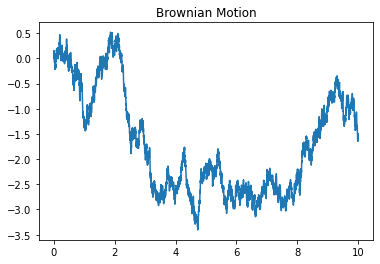

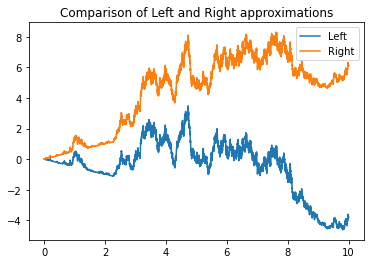

In [6]:
# Code for part a
b = brownian(10,10000)
# b outputs a pair of arrays [time][values]
plt.plot(b[0],b[1])
plt.title("Brownian Motion")
plt.show()

# Numerically compute \B(s)dB(s)
left = [0]
right = [0]
for i in range(len(b[0])-1):
    left.append(b[1][i]*(b[1][i+1]-b[1][i])+left[-1])
    right.append(b[1][i+1]*(b[1][i+1]-b[1][i])+right[-1])
plt.plot(b[0],left)
plt.plot(b[0],right)
plt.title("Comparison of Left and Right approximations")
plt.legend(["Left","Right"])
plt.show()

**(b)**  
Which approximation is correct  

The left approximation is correct because it is a martingale (stays near zero)  
wheras the right approximation tends to drift off.  
This is a stochastic integral of progressivly measurable function which should be a martingale


**(c)**  
Calculate the integral analytically  

We start by applying the Ito formula $f(B(t))=f(B(0))+\int_0^t f'(B(s))dB(s) + 1/2\int_0^t f''(B(s))ds$  
with $f = x^2$
$$ B(t)^2 = B(0)^2 + 2\int_0^t B(s)dB(s) + \int_0^t ds$$
then by rearrangement we get
$$ \int_0^t B(s)dB(s) = \frac{B(t)^2-t}{2} $$



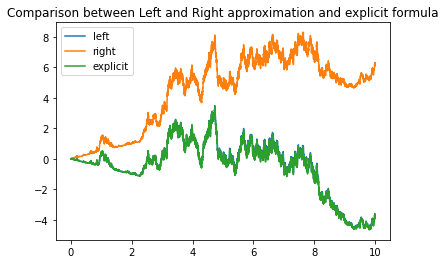

The explicit formula matches up almost perfectly with the left approximation as suggested by the answer to b


In [7]:
# Code for part d
explicit =[]
for i in range(len(b[0])):
    explicit.append((b[1][i]**2-b[0][i])/2)
plt.plot(b[0],left)
plt.plot(b[0],right)
plt.plot(b[0],explicit)
plt.legend(["left","right","explicit"])
plt.title("Comparison between Left and Right approximation and explicit formula")
plt.show()
print("The explicit formula matches up almost perfectly with the left approximation as suggested by the answer to b")